# Lecture 5: Unsupervised Models, [*k*-means Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* How to perform *k*-means clustering with `sklearn`.

## Imports

In [1]:
import numpy as np

import pandas as pd
pd.options.display.float_format='{:,.2f}'.format

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

## Data

To generate data for this example, we use sklearn's [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make_blobs) function, which we configure to return us 4 moderately separated clusters.

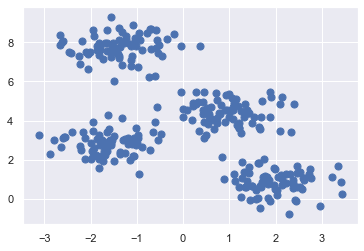

In [2]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

As this data generating procedure implies, the $Y$'s we try to learn using unsupervised learning often *do* exist, it is just that we do not observe them (they are *latent*).

## K-means Clustering

### Steps 1-4
We follow the `sklearn` training process as seen on the slides. Note that the process is the same for supervised and unsupervised models.

We use [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html):
* We know that there are 4 clusters because we generated the data, but discovering how many clusters there ought to be is difficult. A good approach is the elbow method on the overall within-cluster variance (`KMeans.inertia_`: the "sum of squared distances of samples to their closest cluster center"). This was covered in a previous lecture.
* `init`: how to make the first guess; sklearn by default maximises the distance between the cluster centroids.

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

The data is very well-behaved, so a single run of K-means is sufficient to identify the correct clusters:

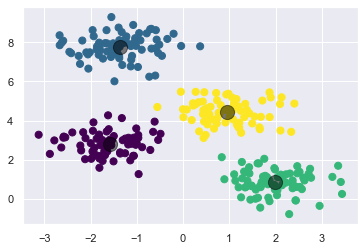

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

You can get the inertia from `KMeans.inertia_`:

In [5]:
kmeans.inertia_

212.00599621083478

© 2023 Philipp Cornelius